In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\user\GitHub\AAPL\AAPL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,3.745536,4.017857,3.392857,3.553571,3.084645,763800800
1,2000-01-08,3.642857,3.651786,3.089286,3.587054,3.113708,836435600
2,2000-01-15,3.607143,4.339286,3.587054,3.975446,3.450849,845969600
3,2000-01-22,3.872768,4.078125,3.593750,3.629464,3.150523,517168400
4,2000-01-29,3.607143,3.928571,3.375000,3.857143,3.348157,596106000


In [4]:
print("Initial column identifiers: ")
data.columns

Initial column identifiers: 


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
#Create pandas-DataFrame
df = pd.DataFrame(data, columns=["Date", "Open", "Close", "Adj Close"])

df.rename(columns={"Adj Close":"Adj_Close"}, inplace=True)
df.head(n=3)

,Date,Open,Close,Adj_Close
0,2000-01-01,3.745536,3.553571,3.084645
1,2000-01-08,3.642857,3.587054,3.113708
2,2000-01-15,3.607143,3.975446,3.450849


In [6]:
df.tail(n=3)

,Date,Open,Close,Adj_Close
1051,2020-02-22,297.260010,273.359985,273.359985
1052,2020-02-29,282.279999,289.029999,289.029999
1053,2020-03-07,263.750000,266.170013,266.170013


In [7]:
print("Entrance time: " + df["Date"].min())

Entrance time: 2000-01-01


In [8]:
print("Last date: " + df.Date.max())

Last date: 2020-03-07


In [9]:
h = round(df["Adj_Close"].max(), 2)
print("Highest value in Adj_Close: " + str(h))

l = round(df.Adj_Close.min(), 2)
print("Lowest value in Adj_Close: " + str(l))

Highest value in Adj_Close: 324.95
Lowest value in Adj_Close: 0.81


In [10]:
print("At following dates the Adj_Close is greater than 300:")
df.loc[df['Adj_Close'] > 300, ['Date']]

At following dates the Adj_Close is greater than 300:


,Date
1044,2020-01-04
1045,2020-01-11
1046,2020-01-18
1047,2020-01-25
1048,2020-02-01
1049,2020-02-08
1050,2020-02-15


In [11]:
print("Date the Adj_Close reaches the peak:")
df.loc[df['Adj_Close'] == np.max(df['Adj_Close']), ['Date', 'Adj_Close']]
# df.loc[df['Adj_Close'] == df["Adj_Close"].max(), ['Date']]


Date the Adj_Close reaches the peak:


,Date,Adj_Close
1049,2020-02-08,324.950012


In [12]:
# Using different notation (numpy, pandas)

print("Mean in Open: " + str(round(df.Open.mean(), 2)))
print("Mean in Close: " + str(round(np.mean(df.Close), 2)))
print("Mean in Adj_Close: " + str(round(df["Adj_Close"].mean(), 2)))


Mean in Open: 61.66
Mean in Close: 61.93
Mean in Adj_Close: 58.13


In [13]:
# statistical summary

df.describe()

,Open,Close,Adj_Close
count,1054.000000,1054.000000,1054.000000
mean,61.660075,61.928145,58.125334
std,68.560452,69.047556,67.711066
min,0.937857,0.937143,0.813478
25%,4.988214,5.019464,4.357100
50%,29.577143,29.640715,25.729351
75%,101.472498,101.394998,93.462414
max,317.190002,324.950012,324.950012


In [14]:
X = df.loc[:, ["Open", "Close"]]
y = df.loc[:, "Adj_Close"]

In [15]:
# Using linear regression (without cross-validation)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(X, y)
pred = model.predict([[273.75, 276.17]])

print("Prediction: " + str(pred))
print("As integer: " + str(pred.astype(np.int32)))

Prediction: [268.04439046]
As integer: [268]


In [16]:
# Linear regression with cross-validation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))
print()


from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
model1 = lr1.fit(X_train, y_train)
y_pred = model1.predict(X_test)


from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² of prediction: " + str(r2))


X_train shape: (948, 2)
y_train shape: (948,)
X_test shape: (106, 2)
y_test shape: (106,)

R² of prediction: 0.9984737906376883


In [17]:
# Using different ensemble classes for regression problems (without cross-validation)


# a) AdaBoostRegressor 

from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()

model_ada = ada.fit(X, y)
pred_ada = model_ada.predict([[273.75, 276.17]])

print("AdaBoost-prediction: " + str(pred_ada))
print("AdaBoost as integer: " + str(pred_ada.astype(np.int32)))




# b) BagginRegressor, an ensemble method

from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor()

model_br = br.fit(X, y)
pred_br = model_br.predict([[273.75, 276.17]])

print("BaggingRegressor-prediction: " + str(pred_br))
print("BaggingRegressor as integer: " + str(pred_br.astype(np.int32)))





# c) GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

model_gbr = gbr.fit(X, y)
pred_gbr = model_gbr.predict([[273.75, 276.17]])

print("GradientBoostingRegressor-prediction: " + str(pred_gbr))
print("GradientBoostingRegressor as integer: " + str(pred_gbr.astype(np.int32)))





# d) ExtraTreesRegressor, an ensemble method

from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()

model_etr = etr.fit(X, y)
pred_etr = model_etr.predict([[273.75, 276.17]])

print("ExtraTreesRegressor-prediction: " + str(pred_etr))
print("ExtraTreesRegressor as integer: " + str(pred_etr.astype(np.int32)))



AdaBoost-prediction: [272.94539271]
AdaBoost as integer: [272]
BaggingRegressor-prediction: [275.2406492]
BaggingRegressor as integer: [275]
GradientBoostingRegressor-prediction: [273.7356364]
GradientBoostingRegressor as integer: [273]
ExtraTreesRegressor-prediction: [276.524603]
ExtraTreesRegressor as integer: [276]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
# Using decision tree classes


# a) ExtraTreeRegressor

from sklearn.tree import ExtraTreeRegressor

etrr = ExtraTreeRegressor()

model_etrr = etrr.fit(X, y)
pred_etrr = model_etrr.predict([[273.75, 276.17]])

print("ExtraTreeRegressor-prediction: " + str(pred_etrr))
print("ExtraTreeRegressor as integer: " + str(pred_etrr.astype(np.int32)))




# b) DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

model_dtr = dtr.fit(X, y)
pred_dtr = model_dtr.predict([[273.75, 276.17]])

print("DecisionTreeRegressor-prediction: " + str(pred_dtr))
print("DecisionTreeRegressor as integer: " + str(pred_dtr.astype(np.int32)))

ExtraTreeRegressor-prediction: [278.778381]
ExtraTreeRegressor as integer: [278]
DecisionTreeRegressor-prediction: [274.498535]
DecisionTreeRegressor as integer: [274]


In [19]:
# Computing the return 

df1 = pd.DataFrame(df, columns=["Date","Open","Close","Adj_Close","Return"])
df1["Return"] = df1["Adj_Close"].pct_change()

df1

,Date,Open,Close,Adj_Close,Return
0,2000-01-01,3.745536,3.553571,3.084645,NaN
1,2000-01-08,3.642857,3.587054,3.113708,0.009422
2,2000-01-15,3.607143,3.975446,3.450849,0.108276
3,2000-01-22,3.872768,3.629464,3.150523,-0.087030
4,2000-01-29,3.607143,3.857143,3.348157,0.062731
...,...,...,...,...,...
1049,2020-02-08,314.179993,324.950012,324.950012,0.017783
1050,2020-02-15,315.359985,313.049988,313.049988,-0.036621
1051,2020-02-22,297.260010,273.359985,273.359985,-0.126785
1052,2020-02-29,282.279999,289.029999,289.029999,0.057324


In [20]:
# Using different regression classes for predicting the return based on Open and Adj_Close


X_new = df1.loc[1:, ["Open","Adj_Close"]]
y_new = df1.loc[1:, "Return"]                        # without first row because of NaN value


from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor



ridge = Ridge()
ridgeCV = RidgeCV()                            # CV: cross-validation
sgd = SGDRegressor()
linR = LinearRegression()
adaR = AdaBoostRegressor()
bagR = BaggingRegressor()



for reg in [ridge, ridgeCV, sgd, linR, adaR, bagR]:
    
    model = reg.fit(X_new, y_new)
    pred = model.predict([[273.75, 276.17]])
    
    if reg == ridge:
        print("Ridge-Regression:  " +  str(pred))
    elif reg == ridgeCV:
        print("RidgeCV:           " +  str(pred))
    elif reg == sgd:
        print("SGDRegressor:      " +  str(pred))
    elif reg == linR:
        print("LinearRegression:  " +  str(pred))
    elif reg == adaR:
        print("AdaBoostRegressor: " +  str(pred))
    elif reg == bagR:
        print("BaggingRegressor:  " +  str(pred))
    else:
        print("not found")




Ridge-Regression:  [0.03893203]
RidgeCV:           [0.03890224]
SGDRegressor:      [5.16296078e+13]
LinearRegression:  [0.03893534]
AdaBoostRegressor: [0.00272825]
BaggingRegressor:  [0.00122982]


In [21]:
# Save df1 as a new csv file under the following path/directory

df1.to_csv(r"C:\Users\user\GitHub\AAPL\AAPL_new.csv")

Maximum of Adj_Close:
Date         2020-03-07
Open             317.19
Close            324.95
Adj_Close        324.95
Return         0.266436
dtype: object


Predicted 'Return':
[0.00599749]
[0.00600267]
[0.00600784]
[0.00601302]
[0.00601819]
[0.00602337]
[0.00602855]
[0.00603372]
[0.0060389]
[0.00604407]
[0.00604925]




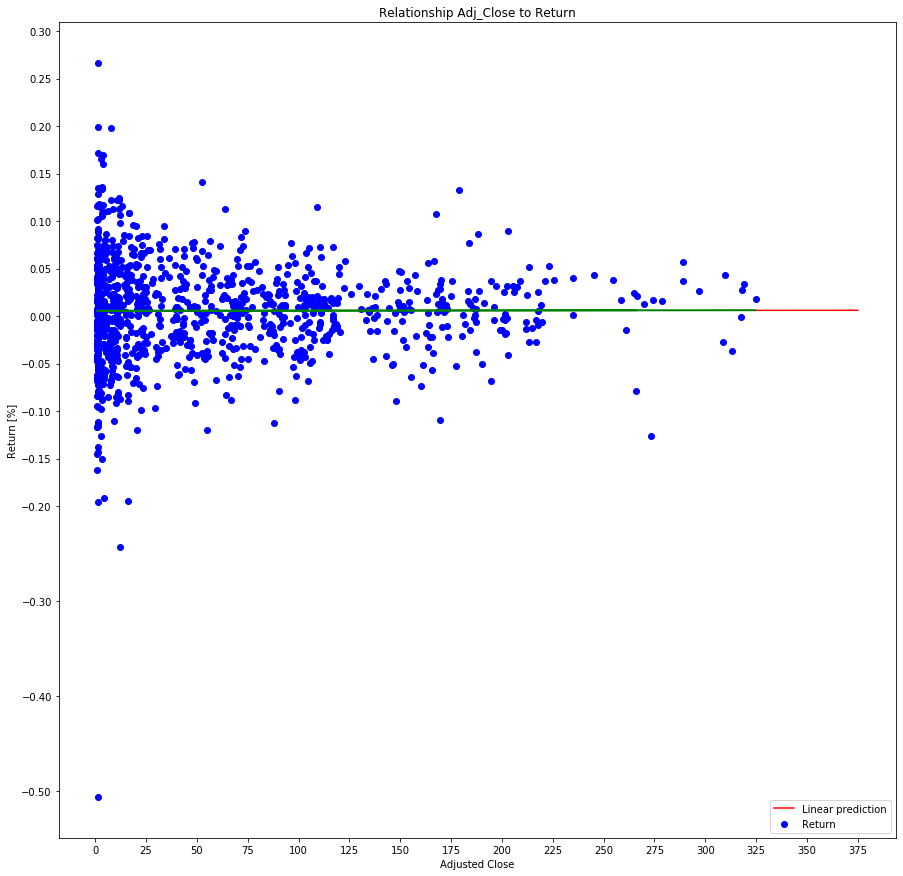

In [22]:
# some plotting

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline 

print("Maximum of Adj_Close:")
print(df1.max())
print()
print()


x = df1.loc[1:, ["Adj_Close"]]
y = df1.loc[1:, "Return"]     

lr = LinearRegression()

model = lr.fit(x, y)


x_old = x
y_old = model.predict(x_old)


x_new = [[325], [330], [335], [340], [345], [350], [355], [360], [365], [370], [375]]
y_new = model.predict(x_new)

print("Predicted 'Return':") 
for p in x_new:
    pred = model.predict([p])
    print(pred)

    
print()
print()


plt.figure(figsize=(15,15))
plt.scatter(x, y, color="blue", label="Return")
plt.plot(x_old, y_old, color="green")
plt.plot(x_new, y_new, color="red", label="Linear prediction")
plt.xticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375])  
plt.yticks([-0.5,-0.4,-0.3,-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.15,0.2,0.25,0.3])
plt.xlabel("Adjusted Close")
plt.ylabel("Return [%]")
plt.title("Relationship Adj_Close to Return")
plt.legend(loc='lower right')
plt.show()

In [23]:
# New DataFrame without outliers in column Return

df2 = df1.loc[df1['Return'].between(-0.2, 0.15), ['Date', 'Open','Close','Adj_Close','Return']]
df2.reset_index()

,index,Date,Open,Close,Adj_Close,Return
0,1,2000-01-08,3.642857,3.587054,3.113708,0.009422
1,2,2000-01-15,3.607143,3.975446,3.450849,0.108276
2,3,2000-01-22,3.872768,3.629464,3.150523,-0.087030
3,4,2000-01-29,3.607143,3.857143,3.348157,0.062731
4,5,2000-02-05,3.857143,3.883929,3.371409,0.006945
...,...,...,...,...,...,...
1039,1049,2020-02-08,314.179993,324.950012,324.950012,0.017783
1040,1050,2020-02-15,315.359985,313.049988,313.049988,-0.036621
1041,1051,2020-02-22,297.260010,273.359985,273.359985,-0.126785
1042,1052,2020-02-29,282.279999,289.029999,289.029999,0.057324


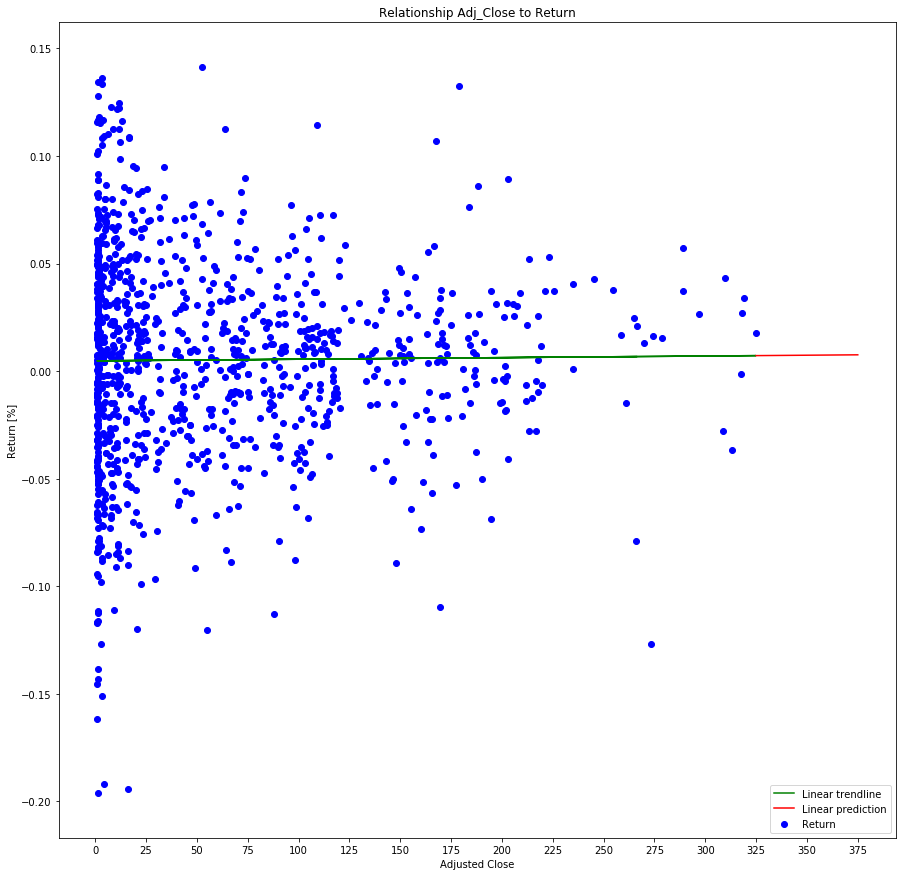

In [24]:
#import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
#%matplotlib inline 

#without defined outliers


x = df2.loc[0:, ["Adj_Close"]]
y = df2.loc[0:, "Return"]     

lr = LinearRegression()

model = lr.fit(x, y)


x_old = x
y_old = model.predict(x_old)


x_new = [[325], [330], [335], [340], [345], [350], [355], [360], [365], [370], [375]]
y_new = model.predict(x_new)


plt.figure(figsize=(15,15))
plt.scatter(x, y, color="blue", label="Return")
plt.plot(x_old, y_old, color="green", label="Linear trendline")
plt.plot(x_new, y_new, color="red", label="Linear prediction")
plt.xticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375])  
plt.yticks([-0.2,-0.15,-0.1,-0.05,0,0.05,0.1,0.15])
plt.xlabel("Adjusted Close")
plt.ylabel("Return [%]")
plt.title("Relationship Adj_Close to Return")
plt.legend(loc='lower right')
plt.show()